<a href="https://colab.research.google.com/github/Shubhamd13/NLP/blob/main/7_1_Practice_Midterm_2_Student_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1: Decoding Algorithms

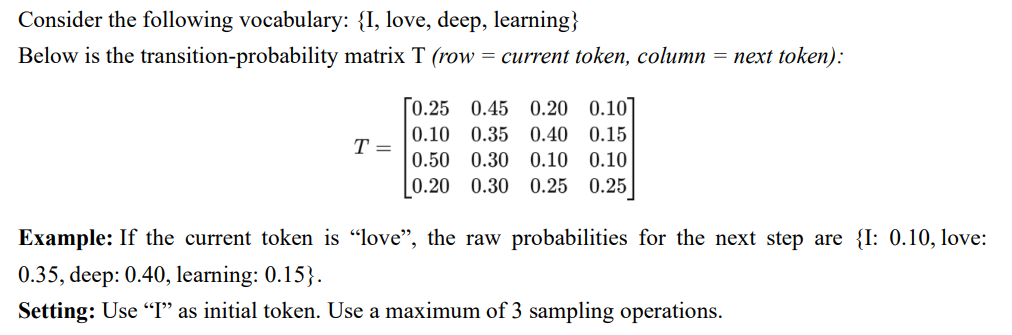

In [1]:
import numpy as np

# Define vocabulary and index mapping
vocab = ['I', 'love', 'deep', 'learning']
vocab_to_index = {word: idx for idx, word in enumerate(vocab)}

# Transition matrix T
T = np.array([
    [0.25, 0.45, 0.20, 0.10],  # from "I"
    [0.10, 0.35, 0.40, 0.15],  # from "love"
    [0.50, 0.30, 0.10, 0.10],  # from "deep"
    [0.20, 0.30, 0.25, 0.25]   # from "learning"
])

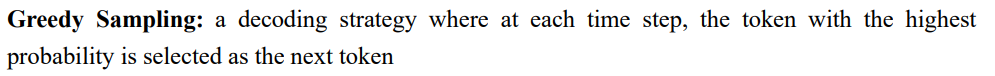

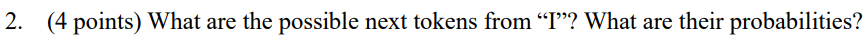


In [2]:
current_token = 'I'
row = T[vocab_to_index[current_token]] # transition matrix row for the current token
next_probs = {vocab[i]: prob for i, prob in enumerate(row)}

print("Next tokens from 'I' and their probabilities:")
for token, prob in next_probs.items():
    print(f"{token}: {prob}")

Next tokens from 'I' and their probabilities:
I: 0.25
love: 0.45
deep: 0.2
learning: 0.1


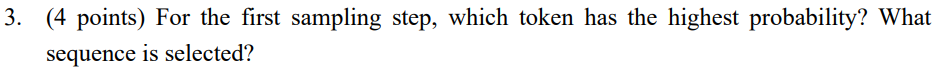

In [3]:
###<--- Write code here
next_token_index =  row.argmax()             # Select the highest probability token from the transition matrix row of the current token
###

next_token = vocab[next_token_index]
sequence = [current_token, next_token]

print(f"First sampled token (greedy): {next_token}")
print(f"Sequence so far: {sequence}")

First sampled token (greedy): love
Sequence so far: ['I', 'love']


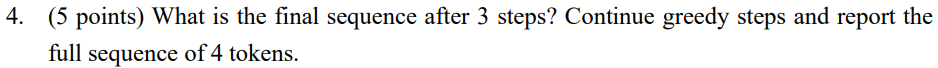

In [4]:
sequence = ['I']
current_index = vocab_to_index['I']

max_steps = 3
for _ in range(max_steps):
    next_index = np.argmax(T[current_index])
    next_token = vocab[next_index]
    sequence.append(next_token)
    current_index = next_index

print(f"Final sequence (greedy sampling): {sequence}")

Final sequence (greedy sampling): ['I', 'love', 'deep', 'I']


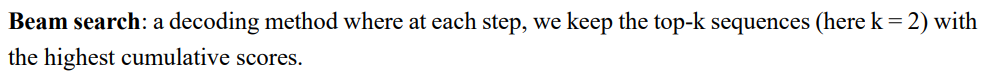

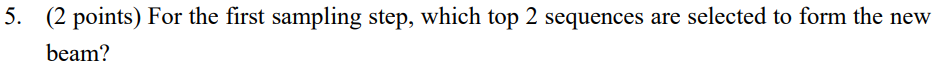

In [5]:
import numpy as np

top_k = 2

# Initial token
start_token = "I"
start_index = vocab_to_index[start_token]

# First beam expansion
first_probs = T[start_index]
beam = []

for i, prob in enumerate(first_probs):
    beam.append((prob, [start_token, vocab[i]]))

# Sort and get top 2
beam.sort(reverse=True, key=lambda x: x[0])
top2_beam = beam[:top_k]

# Print top 2 sequences
for score, seq in top2_beam:
    print(f"Sequence: {seq}, Score: {score:.4f}")

Sequence: ['I', 'love'], Score: 0.4500
Sequence: ['I', 'I'], Score: 0.2500


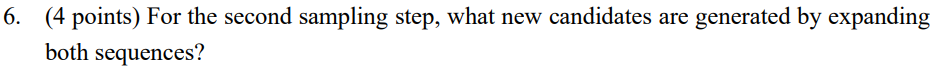

In [6]:
# Expand each of the 2 beams
new_candidates = []

for score, seq in top2_beam:
    last_token = seq[-1]
    last_idx = vocab_to_index[last_token]
    probs = T[last_idx]

    for next_idx, prob in enumerate(probs):
        new_seq = seq + [vocab[next_idx]]

        ###<--- Write code here
        new_score =    score * prob           # multiply previous beam score with next token probability
        ###

        new_candidates.append((new_seq, new_score))

# Display generated candidates
for seq, score in new_candidates:
    print(f"Sequence: {' '.join(seq)}, Score: {score:.6f}")

Sequence: I love I, Score: 0.045000
Sequence: I love love, Score: 0.157500
Sequence: I love deep, Score: 0.180000
Sequence: I love learning, Score: 0.067500
Sequence: I I I, Score: 0.062500
Sequence: I I love, Score: 0.112500
Sequence: I I deep, Score: 0.050000
Sequence: I I learning, Score: 0.025000


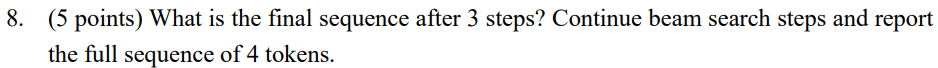

In [7]:
def expand_beam(beam):
    new_beam = []
    for score, seq in beam:
        last_token = seq[-1]
        last_index = vocab_to_index[last_token]
        probs = T[last_index]
        for i, prob in enumerate(probs):
            new_seq = seq + [vocab[i]]
            new_score = score * prob
            new_beam.append((new_score, new_seq))
    return new_beam

# Step 1: Already done in question 5
beam = top2_beam

# Step 2: similar to question 6
beam = expand_beam(beam)
beam.sort(reverse=True, key=lambda x: x[0])
beam = beam[:top_k]

# Step 3
beam = expand_beam(beam)
beam.sort(reverse=True, key=lambda x: x[0])
best_sequence = beam[0]

# Print final result
print(f"Final sequence: {best_sequence[1]}, Score: {best_sequence[0]:.4f}")

Final sequence: ['I', 'love', 'deep', 'I'], Score: 0.0900


# Section 2: Encoder-Decoder

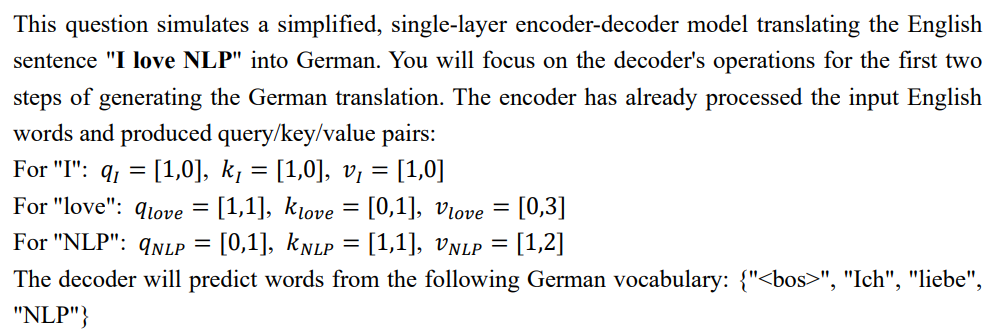

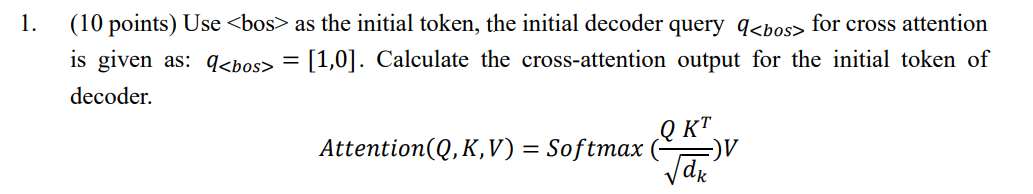

In [8]:
import numpy as np

# Encoder outputs: (only keys and values are used in decoder)
K = np.array([
    [1, 0],  # k_I
    [0, 1],  # k_love
    [1, 1]   # k_NLP
])

V = np.array([
    [1, 0],  # v_I
    [0, 3],  # v_love
    [1, 2]   # v_NLP
])

# Decoder's initial query for <bos>
q_bos = np.array([1, 0])

In [9]:
import numpy as np

def softmax(x):
    e_x = np.exp(x)
    return e_x / e_x.sum()

# Step 1: Compute dot products q_bos · K^T and scaled score
d = 2
scores = q_bos @ K.T / np.sqrt(d)
attention_weights = softmax(scores)

# Step 2: Weighted sum with V
cross_attn_output = attention_weights @ V

print("Cross-attention output:", cross_attn_output)

Cross-attention output: [0.80222419 1.39555163]


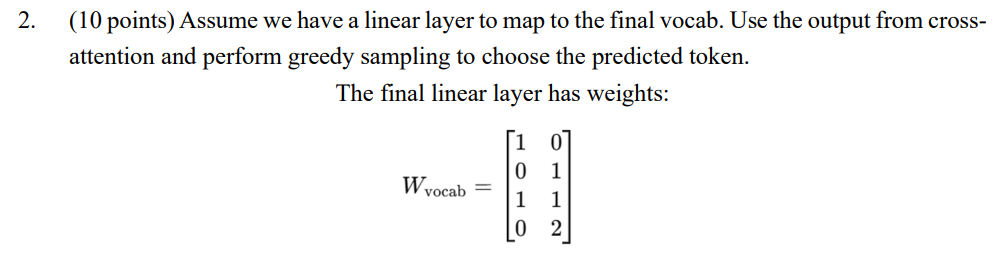

In [11]:
# Linear transformation weights
W_vocab = np.array([
    [1, 0],  # <bos>
    [0, 1],  # Ich
    [1, 1],  # liebe
    [0, 2]   # NLP
])

# Compute logits

###<--- Write code here
logits =  W_vocab@cross_attn_output                 # multiply linear layer weights with the cross attention output
###


# Perform greedy decoding
predicted_index = np.argmax(logits)
german_vocab = ["<bos>", "Ich", "liebe", "NLP"]
predicted_token = german_vocab[predicted_index]

print("Predicted token:", predicted_token)

Predicted token: NLP


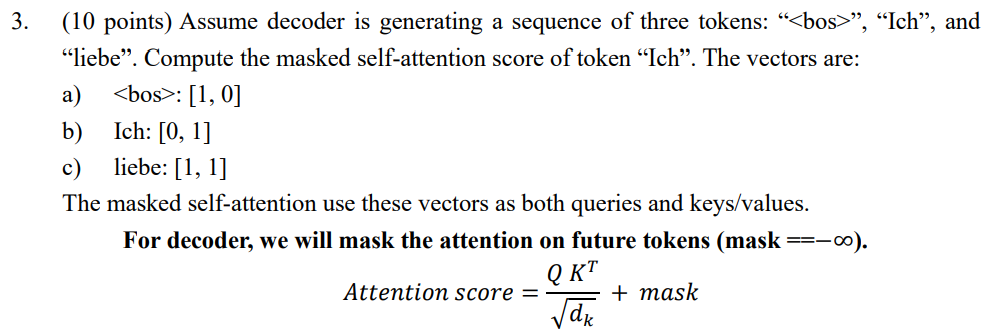

In [12]:
import numpy as np

# Define vectors
bos = np.array([1, 0])
ich = np.array([0, 1])
liebe = np.array([1, 1])

# Self-attention setup
Q = ich
K = np.array([bos, ich, liebe])
d = 2

# Attention scores before mask
raw_scores = Q @ K.T / np.sqrt(d)

# Causal mask: we are at position 1 (Ich), so mask future (position 2)
mask = np.array([0, 0, -np.inf])  # allowed: bos and ich

# Apply mask
masked_scores = raw_scores + mask

print("Masked self-attention scores for 'Ich':", masked_scores)

Masked self-attention scores for 'Ich': [0.         0.70710678       -inf]


# Section 3: REINFORCE Algorithm

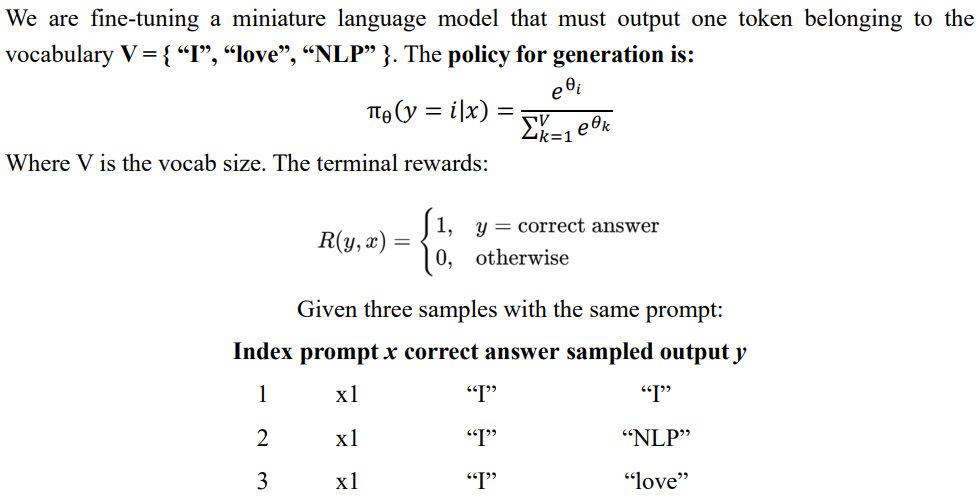

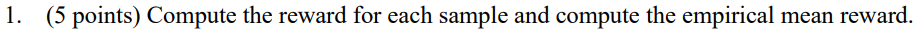

In [13]:
rewards = [1, 0, 0]  # only the first sample matches the correct answer
mean_reward = sum(rewards) / len(rewards)
print("Empirical Mean Reward:", mean_reward)

Empirical Mean Reward: 0.3333333333333333


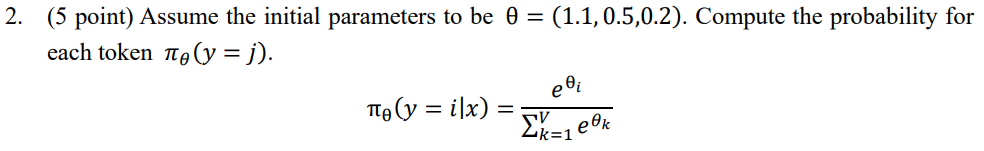

In [14]:
import numpy as np

theta = np.array([1.1, 0.5, 0.2])  # corresponds to ["I", "love", "NLP"]
exp_theta = np.exp(theta)
pi = exp_theta / exp_theta.sum()

print("Probabilities π(y = j):")
print(f'I: {pi[0]:.4f}, love: {pi[1]:.4f}, NLP: {pi[2]:.4f}')

Probabilities π(y = j):
I: 0.5114, love: 0.2807, NLP: 0.2079


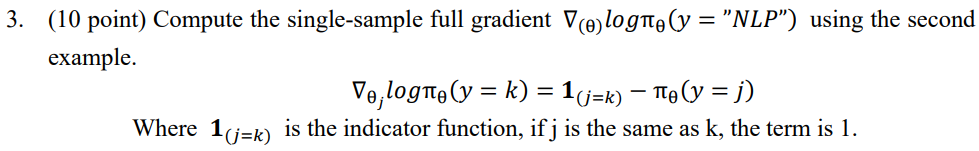

In [15]:
indicator = np.array([0, 0, 1]) # one-hot vector for output "NLP" (index 2)
grad_log_pi = indicator - pi

print("Gradient of log π(y = 'NLP'):", grad_log_pi)

Gradient of log π(y = 'NLP'): [-0.51140921 -0.28066732  0.79207653]


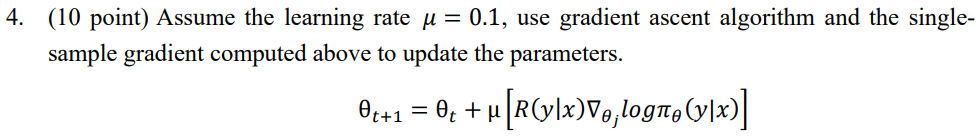

In [16]:
mu = 0.1
reward = 0  # for sample 2

theta_new = theta + mu * reward * grad_log_pi
print("Updated θ (no baseline):", theta_new)

Updated θ (no baseline): [1.1 0.5 0.2]


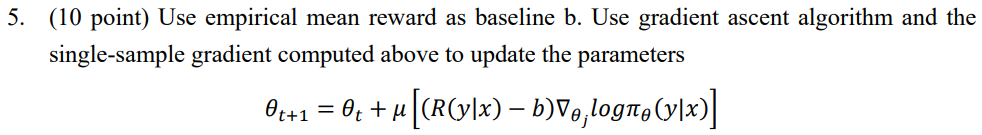

In [17]:
b = mean_reward  # empirical mean reward = 1/3

###<--- Write code here
theta_new_baseline = theta + (mu * (reward-b) * grad_log_pi)                          # implement the above formula
###

print("Updated θ (with baseline):", theta_new_baseline)

Updated θ (with baseline): [1.11704697 0.50935558 0.17359745]
